<a href="https://colab.research.google.com/github/Hohlas/Nero/blob/main/fx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

!pip install mpl_finance


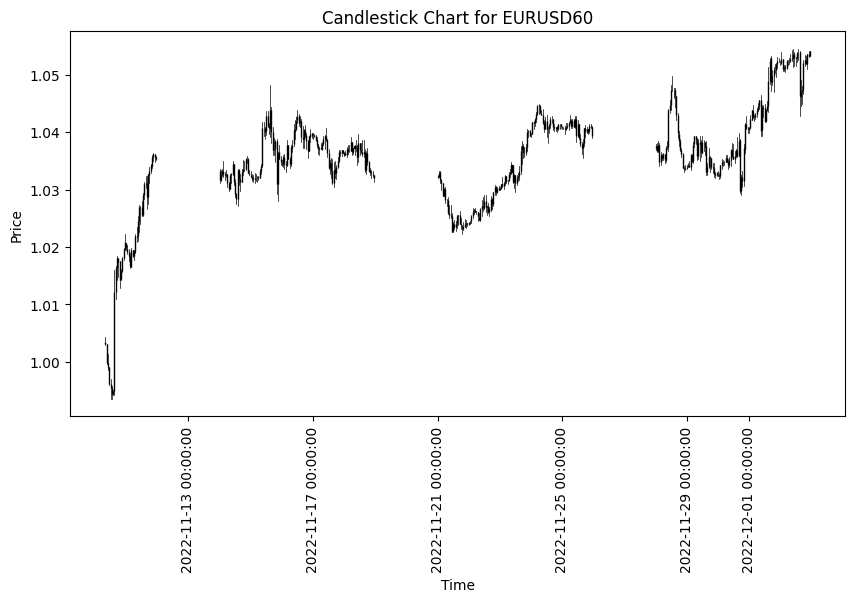

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc

# Загрузка данных из файла
history_data = 'https://drive.google.com/uc?id=1_eYsMYv8L_rrFrNnVN39ugbSVvC12Mm5'
data = pd.read_csv(history_data, header=None, sep=',', names=['date', 'time', 'open', 'high', 'low', 'close', 'volume'])

# Преобразование времени в формат, понятный matplotlib
data['datetime'] = pd.to_datetime(data['date'], format='%Y.%m.%d').dt.strftime('%Y-%m-%d') + ' ' + data['time']
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y-%m-%d %H:%M')
data['time'] = data['datetime'].apply(mdates.date2num)

# Выбор последних 100 строк
data = data.tail(400)

# Построение графика в виде баров
fig, ax = plt.subplots()
candlestick_ohlc(ax, data[['time', 'open', 'high', 'low', 'close']].values, width=0.0001, colorup='black', colordown='black')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.set_title('Candlestick Chart for EURUSD60')
fig.set_size_inches(10, 5)# Установка размера окна
plt.xticks(rotation=90)# Установка вертикального направления подписей шкалы "Time"
plt.show()

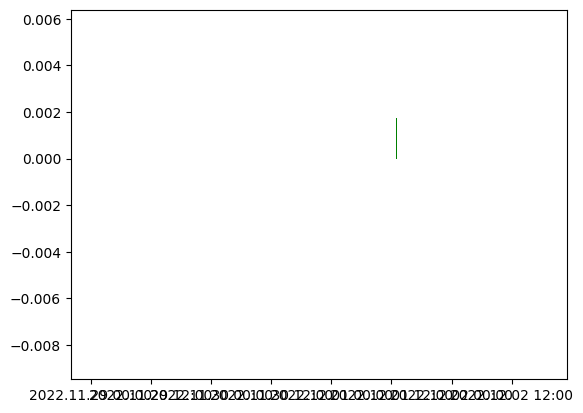

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Загрузка данных из файла
history_data = 'https://drive.google.com/uc?id=1_eYsMYv8L_rrFrNnVN39ugbSVvC12Mm5'
data = pd.read_csv(history_data, header=None, sep=',', names=['date', 'time', 'open', 'high', 'low', 'close', 'volume'])

# Преобразование времени в формат, понятный matplotlib
data['datetime'] = pd.to_datetime(data['date'], format='%Y.%m.%d').dt.strftime('%Y-%m-%d') + ' ' + data['time']
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y-%m-%d %H:%M')
data['time'] = data['datetime'].apply(mdates.date2num)

# Выбор последних 100 строк
data = data.tail(100)

# Построение графика в виде баров
fig, ax = plt.subplots()
ax.bar(data['time'], data['close'] - data['open'], width=0.0001, align='center', color=['green' if c > o else 'red' for c, o in zip(data['close'], data['open'])])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d %H:%M'))
ax.set_xlim([data['time'].iloc[-100], data['time'].iloc[-1]])
plt.show()

